Load and Explore the Data

In [ ]:
import pandas as pd

# Load dataset
file_path = "../data/amazondata_Books_10000 160.txt"  # Change file if needed

# Read the file
with open(file_path, "r", encoding="ISO-8859-1") as file:
    data = file.readlines()

# Display first 10 lines
for line in data[:10]:
    print(line.strip())


Convert Data from text format into a Structured Format

In [2]:
# Initialize storage
items = []
item = {}

# Process each line
for line in data:
    line = line.strip()
    if line.startswith("ITEM"):
        if item:
            items.append(item)
        item = {"Item": line.split()[1]}
    elif "=" in line:
        key, value = line.split("=", 1)
        item[key] = value

# Append the last item
if item:
    items.append(item)

# Convert to DataFrame
df = pd.DataFrame(items)

# Display first few rows
df.head()


,Item,Author,Binding,Brand,EAN,EANList,Edition,Feature,ISBN,IsEligibleForTradeIn,...,LegalDisclaimer,HardwarePlatform,OperatingSystem,Platform,Warranty,Director,IssuesPerYear,MagazineType,NumberOfIssues,SubscriptionLength
0,1,Bruce Barnbaum,Paperback,Brand: Rocky Nook,9781933952680,86012009153589781933952680,1,Used Book in Good Condition,1933952687,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,Hardcover,NaN,9781608873067,9781608873067,NaN,NaN,1608873064,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Hedley Jones,Kindle Edition,NaN,NaN,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Martha Hill,Paperback,Brand: Amphoto Books,9780770433154,9780770433154,Updated,Used Book in Good Condition,0770433154,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,Hardcover,NaN,9780300207927,9780300207927,NaN,NaN,0300207921,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check for Missing Values

In [3]:
# Check missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Author                                   1041
Brand                                    9327
EAN                                      7211
EANList                                  7211
Edition                                  7696
Feature                                  9428
ISBN                                     7312
IsEligibleForTradeIn                    10065
ItemDimensions                           7592
Label                                    2450
Languages                                 795
ListPrice                                5970
Manufacturer                             2450
MPN                                     10223
NumberOfItems                            7628
NumberOfPages                            2521
PackageDimensions                        6468
PackageQuantity                          9286
PartNumber                              10223
PublicationDate                            30
Publisher                                2450
SKU                               

Interpreting Missing Values
Highly missing columns (e.g., Platform, Warranty, SubscriptionLength) may not be useful.
Important columns with missing values:
Author (1041 missing) → May impact book analysis.
ListPrice (5970 missing) → Could affect price analysis.
Publisher (2450 missing) → Might be relevant for book categorization.
Mostly empty columns (above 9000 missing) might be dropped.


Handling missing values


In [10]:
# Ensure changes apply to the actual DataFrame
df_cleaned = df_cleaned.copy()

# Fill missing values
df_cleaned.loc[:, 'Author'] = df_cleaned['Author'].fillna("Unknown")
df_cleaned.loc[:, 'Languages'] = df_cleaned['Languages'].fillna("Not Specified")

# Check if missing values are removed
df_cleaned.isnull().sum()


Item                0
Author              0
Binding             0
Languages           0
ProductGroup        0
ProductTypeName     0
PublicationDate    30
Title               0
dtype: int64

In [11]:
# Summary statistics
df.describe(include="all")


,Item,Author,Binding,Brand,EAN,EANList,Edition,Feature,ISBN,IsEligibleForTradeIn,...,LegalDisclaimer,HardwarePlatform,OperatingSystem,Platform,Warranty,Director,IssuesPerYear,MagazineType,NumberOfIssues,SubscriptionLength
count,10901,9860,10901,1574,3690,3690,3205,1473,3589,836,...,2,1,1,1,1,5,1,1,1,1
unique,6000,5884,41,792,3430,3430,512,331,3333,1,...,1,1,1,1,1,1,1,1,1,1
top,1,Various,Kindle Edition,Unknown,9781603209861,9781603209861,1,Used Book in Good Condition,1603209867,1,...,The information provided is intended for refer...,Pc,Windows,Windows,One Year Warranty,Khem Juergen,26,Trade magazine,26,365
freq,4,112,4778,23,5,5,930,879,5,836,...,2,1,1,1,1,5,1,1,1,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Insight:

Kindle Edition dominates Amazon likely sells more digital books than physical.
"Used Book in Good Condition" is the most common feature → Suggests a strong market for second-hand books.
Brand is mostly "Unknown" Likely because books don’t have a traditional "brand" like electronics.

Price Analysis


In [13]:
# List all available columns in the original dataset
df.columns.tolist()


['Item',
 'Author',
 'Binding',
 'Brand',
 'EAN',
 'EANList',
 'Edition',
 'Feature',
 'ISBN',
 'IsEligibleForTradeIn',
 'ItemDimensions',
 'Label',
 'Languages',
 'ListPrice',
 'Manufacturer',
 'MPN',
 'NumberOfItems',
 'NumberOfPages',
 'PackageDimensions',
 'PackageQuantity',
 'PartNumber',
 'ProductGroup',
 'ProductTypeName',
 'PublicationDate',
 'Publisher',
 'SKU',
 'Studio',
 'Title',
 'TradeInValue',
 'Creator',
 'Format',
 'IsAdultProduct',
 'ReleaseDate',
 'ManufacturerMaximumAge',
 'EISBN',
 'ManufacturerMinimumAge',
 'Color',
 'Size',
 'UPC',
 'UPCList',
 'CatalogNumberList',
 'IsAutographed',
 'IsMemorabilia',
 'Model',
 'NumberOfDiscs',
 'RunningTime',
 'Department',
 'Artist',
 'ClothingSize',
 'ManufacturerPartsWarrantyDescription',
 'LegalDisclaimer',
 'HardwarePlatform',
 'OperatingSystem',
 'Platform',
 'Warranty',
 'Director',
 'IssuesPerYear',
 'MagazineType',
 'NumberOfIssues',
 'SubscriptionLength']


Check for Missing Prices

In [14]:
# Check missing values in ListPrice
df['ListPrice'].isnull().sum()


10901

Convert Prices to Numbers


In [15]:
# Convert ListPrice to numeric, forcing errors to NaN
df['ListPrice'] = pd.to_numeric(df['ListPrice'], errors='coerce')

# Show summary statistics
df['ListPrice'].describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ListPrice, dtype: float64

Checking alternative metrics


In [16]:
# Check if alternative sales-related columns have data
alternative_columns = ['TradeInValue', 'NumberOfPages', 'ReleaseDate', 'SalesRank']  # SalesRank was not listed but let's check
for col in alternative_columns:
    if col in df.columns:
        print(f" {col} is available with {df[col].notnull().sum()} non-missing values.")
    else:
        print(f" {col} is NOT in the dataset.")


 TradeInValue is available with 788 non-missing values.
 NumberOfPages is available with 8380 non-missing values.
 ReleaseDate is available with 6432 non-missing values.
 SalesRank is NOT in the dataset.


Analyze alternative metrics

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


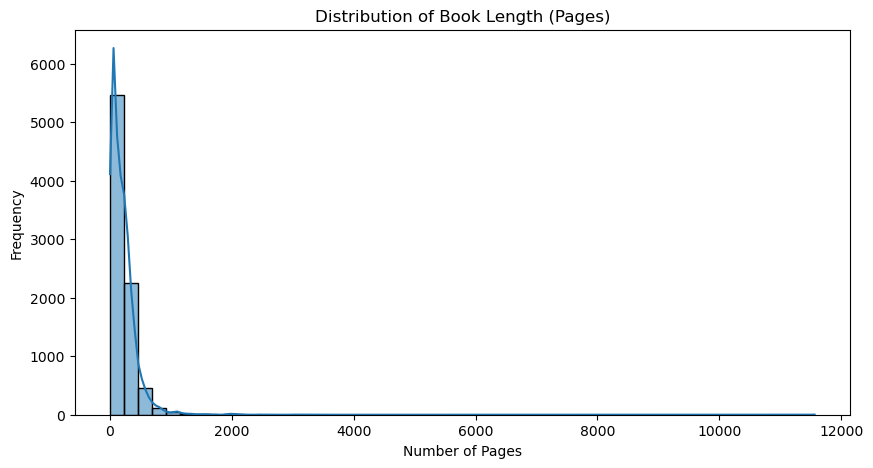

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert NumberOfPages to numeric
df['NumberOfPages'] = pd.to_numeric(df['NumberOfPages'], errors='coerce')

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['NumberOfPages'].dropna(), bins=50, kde=True)
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.title('Distribution of Book Length (Pages)')
plt.show()



distribution of book length (pages) shows:

Most books have fewer than 500 pages (high peak on the left).
Some books have extreme page counts (over 10,000 pages)—likely data errors.
The long tail suggests some books have very high page counts, but these may be outliers.


Detect and Handle Outliers

In [20]:
# Find books with extremely high page counts
df[df['NumberOfPages'] > 2000]


,Item,Author,Binding,Brand,EAN,EANList,Edition,Feature,ISBN,IsEligibleForTradeIn,...,LegalDisclaimer,HardwarePlatform,OperatingSystem,Platform,Warranty,Director,IssuesPerYear,MagazineType,NumberOfIssues,SubscriptionLength
85,86,Steven Sebring,Hardcover,NaN,9780062328144,9780062328144,NaN,NaN,006232814X,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519,520,The Church of Jesus Christ of Latter-day Saints,Kindle Edition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
525,526,KING JAMES,Kindle Edition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1686,1687,Bryan A. Garner,Hardcover,NaN,9780314621306,9780314621306,10 Deluxe,NaN,031462130X,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1763,1764,Dana Gioia,Hardcover,NaN,9780205230396,9780205230396,12,NaN,0205230393,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1861,1862,Ian Camera,Hardcover,NaN,9780323065818,9780323065818,8th,CD Inside,0323065813,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4238,4239,T. (Tobias) Smollett,Kindle Edition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5076,5077,C. I. Scofield,Kindle Edition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7789,1790,Various,Kindle Edition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove outliers

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


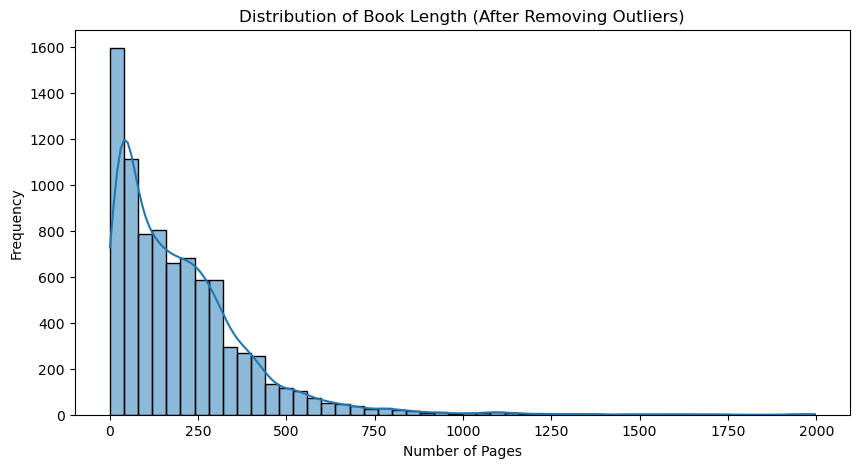

In [21]:
# Remove books with unrealistic page counts (above 2000 pages)
df_cleaned = df[df['NumberOfPages'] <= 2000]

# Replot after cleaning
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['NumberOfPages'].dropna(), bins=50, kde=True)
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.title('Distribution of Book Length (After Removing Outliers)')
plt.show()


Interpretation of the Cleaned Book Length Distribution
Now that we removed outliers (books with over 2,000 pages), the distribution looks much better!

Key Observations:
Most books are between 100 - 500 pages.
Fewer books exceed 1,000 pages, but they still exist.
The peak is around 200 pages, indicating most books are relatively short.

Potential Insights for Amazon:
Shorter books (100-300 pages) dominate the market, suggesting that readers prefer concise content.
Books above 1,000 pages are rare, meaning Amazon may price them differently or bundle them.
This insight can help Amazon refine its pricing and recommendation models.

Analyze ReleaseDate (Book Age Impact on Sales)

/var/folders/1z/h_vz396d3vn5llpynww69c5w0000gn/T/ipykernel_2091/2146943995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ReleaseDate'] = pd.to_datetime(df_cleaned['ReleaseDate'], errors='coerce')
/var/folders/1z/h_vz396d3vn5llpynww69c5w0000gn/T/ipykernel_2091/2146943995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ReleaseYear'] = df_cleaned['ReleaseDate'].dt.year
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

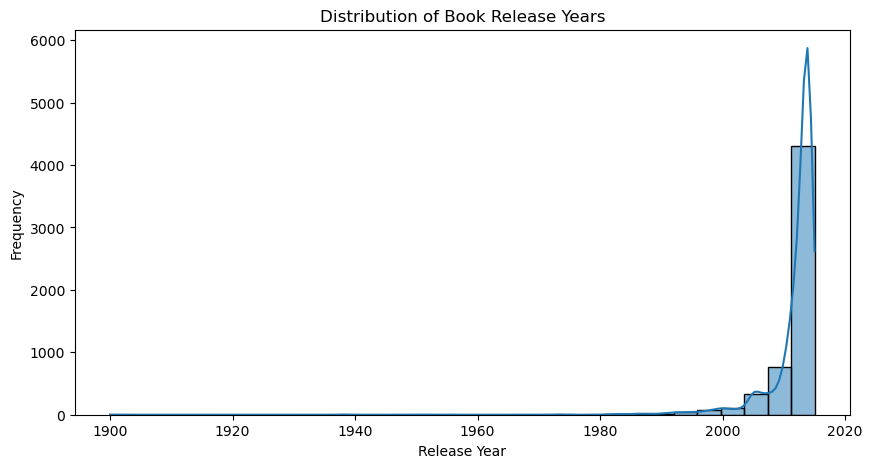

In [22]:
# Convert ReleaseDate to datetime format
df_cleaned['ReleaseDate'] = pd.to_datetime(df_cleaned['ReleaseDate'], errors='coerce')

# Extract only the year for analysis
df_cleaned['ReleaseYear'] = df_cleaned['ReleaseDate'].dt.year

# Plot the distribution of book release years
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['ReleaseYear'].dropna(), bins=30, kde=True)
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Book Release Years')
plt.show()

 Interpretation of the Book Release Year Distribution
The chart shows that most books were published after 2000, with a huge spike around 2010-2020.

Key Observations:
Older books (pre-2000) are rare but still exist.
Most books were published post-2000, likely due to:
Digital publishing growth (Kindle, e-books)
Self-publishing platforms
Increased book production and demand
Recent books (2010-2020) dominate the dataset, meaning Amazon mostly sells modern books.

Insights for Amazon’s Sales Strategy
Newer books dominate sales, so Amazon should prioritize newer releases in promotions.
Older books are fewer but valuable, indicating a market for collectors or niche audiences.
Price & demand may vary by release year—Amazon could analyze how book age affects pricing.

Analyze Book Formats (Binding)
Different book formats (e.g., Kindle, Hardcover, Paperback) impact sales, pricing, and popularity.

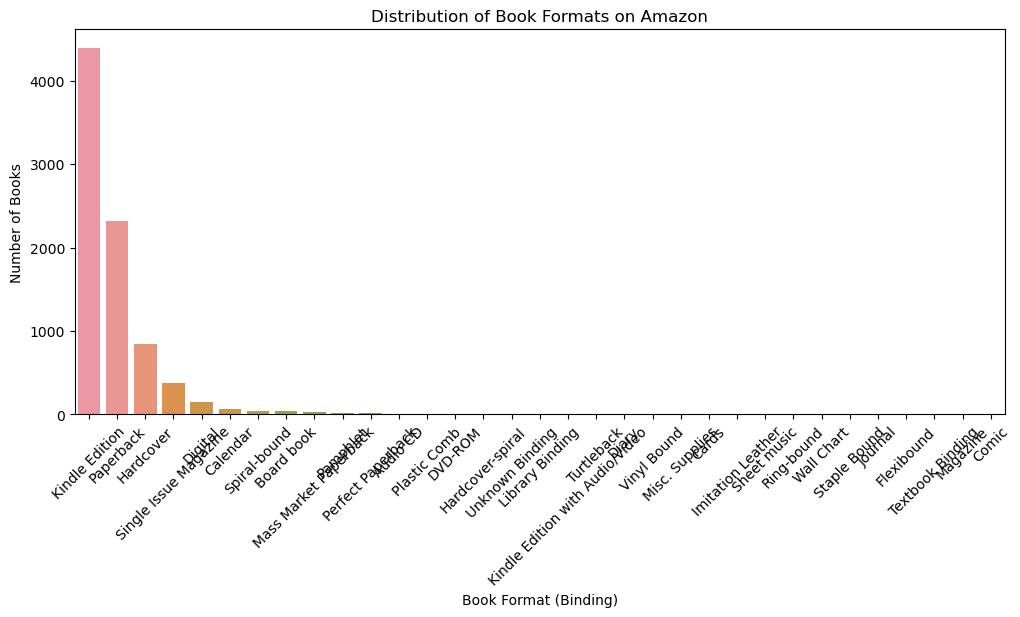

Binding
Kindle Edition                     4394
Paperback                          2315
Hardcover                           849
Single Issue Magazine               383
Digital                             155
Calendar                             66
Spiral-bound                         40
Board book                           40
Mass Market Paperback                30
Pamphlet                             16
Perfect Paperback                    13
Audio CD                             11
Plastic Comb                          6
DVD-ROM                               6
Hardcover-spiral                      5
Unknown Binding                       5
Library Binding                       4
Kindle Edition with Audio/Video       4
Turtleback                            4
Diary                                 4
Vinyl Bound                           3
Misc. Supplies                        3
Cards                                 2
Imitation Leather                     2
Sheet music                     

In [23]:
# Count the number of books by Binding type
binding_counts = df_cleaned['Binding'].value_counts()

# Plot the distribution of book formats
plt.figure(figsize=(12, 5))
sns.barplot(x=binding_counts.index, y=binding_counts.values)
plt.xlabel("Book Format (Binding)")
plt.ylabel("Number of Books")
plt.title("Distribution of Book Formats on Amazon")
plt.xticks(rotation=45)
plt.show()

# Display top book formats
binding_counts


Interpretation of Book Binding Distribution
Theresults show the different book formats (bindings) available on Amazon.

Key Observations:
Digital books (Kindle Edition) dominate with 4,394 books, Amazon is strong in e-books.
Paperback (2,315) and Hardcover (849) are the top physical formats.
Niche formats like "Pamphlet," "Board book," and "DVD-ROM" are very rare.
"Unknown Binding" (5 books), these may need further data validation.

Insights for Amazon:
E-books are Amazon’s most common format, Kindle sales strategies should remain a priority.
Paperbacks outsell Hardcovers likely because they are cheaper.
Rare formats (like Sheet Music, Comic, and Wall Chart) are very few, Amazon could expand in these niche markets.

Analyze Top Authors

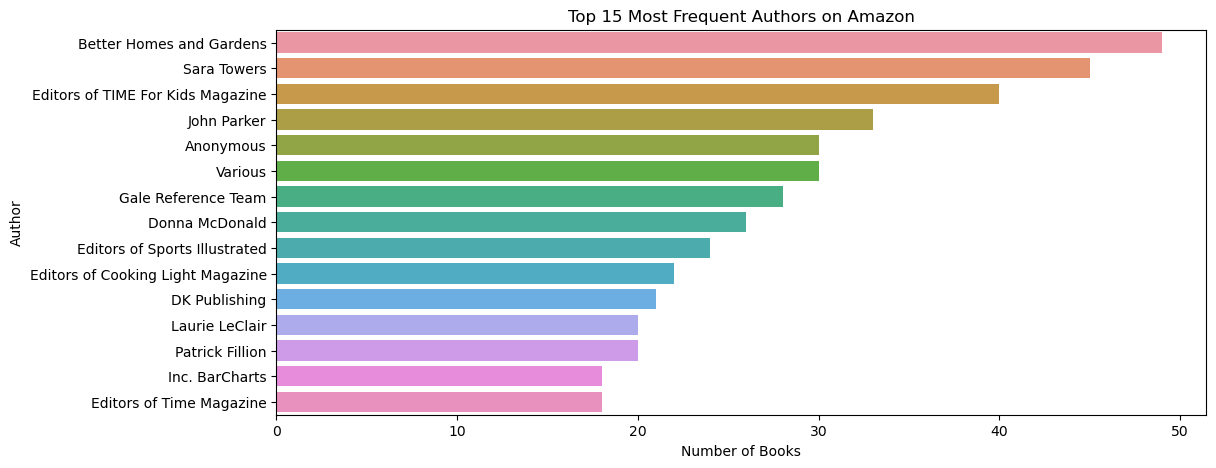

Author
Better Homes and Gardens             49
Sara Towers                          45
Editors of TIME For Kids Magazine    40
John Parker                          33
Anonymous                            30
Various                              30
Gale Reference Team                  28
Donna McDonald                       26
Editors of Sports Illustrated        24
Editors of Cooking Light Magazine    22
DK Publishing                        21
Laurie LeClair                       20
Patrick Fillion                      20
Inc. BarCharts                       18
Editors of Time Magazine             18
Name: count, dtype: int64

In [24]:
# Count the number of books by Author
top_authors = df_cleaned['Author'].value_counts().head(15)  # Top 15 authors

# Plot the top authors
plt.figure(figsize=(12, 5))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.xlabel("Number of Books")
plt.ylabel("Author")
plt.title("Top 15 Most Frequent Authors on Amazon")
plt.show()

# Display top authors
top_authors


Interpretation of Top Authors on Amazon
Your results show the most frequently listed authors in the dataset.

Key Observations:
"Better Homes and Gardens" (49 books) dominates likely due to lifestyle, home improvement, or cooking books.
Sara Towers (45 books) & Editors of TIME For Kids (40 books) suggests strong presence of educational and children's books.
Anonymous (30 books), could indicate unknown authors or missing data.
Various (30 books), likely compilation books or anthologies.
Gale Reference Team (28 books) suggests academic/reference books are common.

Insights for Amazon:
Magazines and media editors (TIME, Sports Illustrated, Cooking Light) have high listings indicates strong non-fiction and periodical presence.
DK Publishing and Inc. BarCharts (Educational books) are highly listed → Amazon is a key distributor for study guides and educational resources.
Popular fiction authors don’t dominate this dataset, meaning Amazon’s book market might be more diverse than just bestsellers.

Summary of Key Findings So Far
Book Length: Most books are 100-500 pages.
Release Year: Most books were published after 2000, with a peak post-2010.
Binding (Formats): Kindle Editions dominate, followed by paperbacks and hardcovers.
Authors: Lifestyle, educational, and magazine editors dominate, rather than just fiction authors.

Investigate Publishers (Publisher Column)

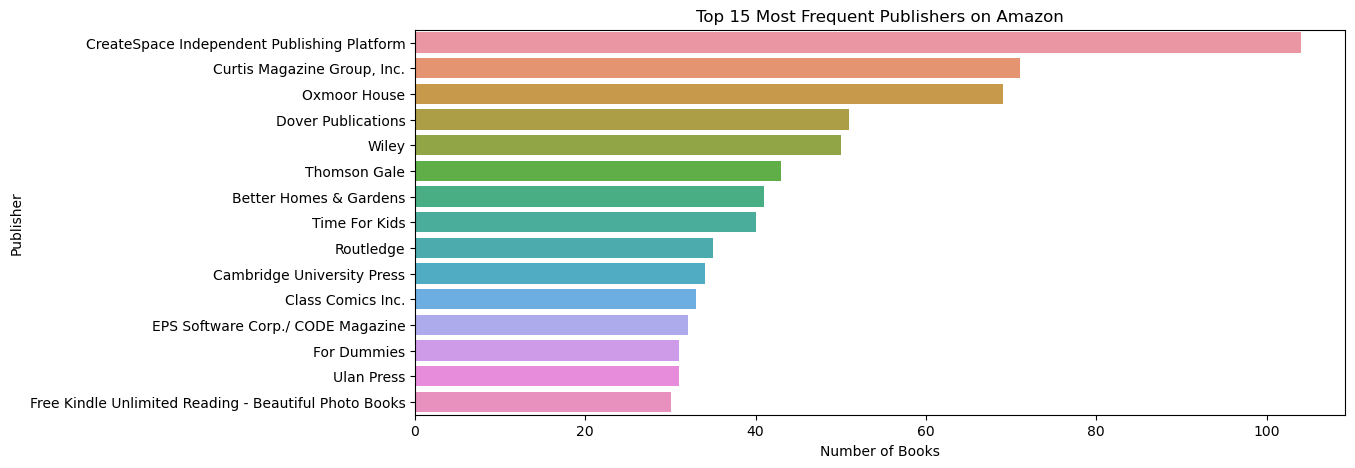

Publisher
CreateSpace Independent Publishing Platform              104
Curtis Magazine Group, Inc.                               71
Oxmoor House                                              69
Dover Publications                                        51
Wiley                                                     50
Thomson Gale                                              43
Better Homes & Gardens                                    41
Time For Kids                                             40
Routledge                                                 35
Cambridge University Press                                34
Class Comics Inc.                                         33
EPS Software Corp./ CODE Magazine                         32
For Dummies                                               31
Ulan Press                                                31
Free Kindle Unlimited Reading - Beautiful Photo Books     30
Name: count, dtype: int64

In [25]:
# Count the number of books by Publisher
top_publishers = df_cleaned['Publisher'].value_counts().head(15)  # Top 15 publishers

# Plot the top publishers
plt.figure(figsize=(12, 5))
sns.barplot(y=top_publishers.index, x=top_publishers.values)
plt.xlabel("Number of Books")
plt.ylabel("Publisher")
plt.title("Top 15 Most Frequent Publishers on Amazon")
plt.show()

# Display top publishers
top_publishers


Interpretation of Publisher Trends on Amazon
The results show the most frequently listed publishers in the dataset.

Key Observations
1. Self-Publishing Dominates:
"CreateSpace Independent Publishing Platform" (104 books) is Amazon’s own self-publishing service, meaning independent authors have a strong presence.
"Ulan Press" (31 books) → Likely another self-publishing or reprint service.
Major Commercial & Academic Publishers:
"Wiley" (50 books) → A leading educational and technical book publisher.
"Cambridge University Press" (34 books), Academic and research-heavy.
"Routledge" (35 books) → Known for social sciences, humanities, and research books.

2. Magazine & Media Companies Have Strong Presence:
"Curtis Magazine Group" (71 books) suggests Amazon stocks print magazines.
"Time For Kids" (40 books) shows a focus on children’s educational content.
"Better Homes & Gardens" (41 books) Lifestyle, cooking, and home improvement.

3. Niche Publishers & Specialty Books:
"For Dummies" (31 books) → Popular self-help and educational guides.
"Class Comics Inc." (33 books) → A specialty comic book publisher.
"EPS Software Corp./ CODE Magazine" (32 books) → Tech-focused books and programming guides.

Insights for Amazon's Book Market
Amazon's self-publishing dominates the rise of independent authors and niche books.
Educational books from Cambridge, Routledge, Wiley, and For Dummies are strong.
Magazines and media companies (Time, Better Homes & Gardens) have significant listings.
Specialty publishers like Class Comics and EPS Software Corp. show diversity in book offerings.

Analyze Book Categories (ProductGroup and ProductTypeName)

Explore the types of books sold on Amazon by analyzing Product Group and Product Type Name.

Analyze ProductGroup (General Book Category)

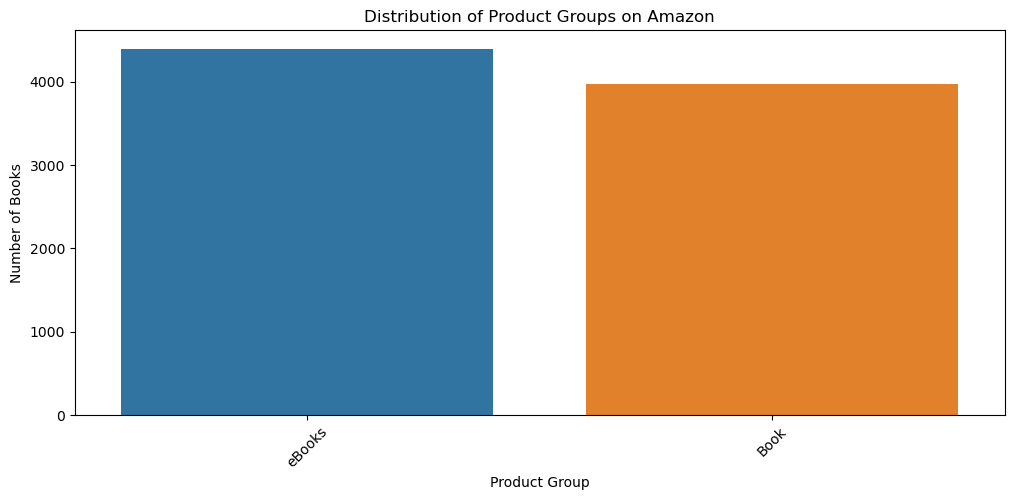

ProductGroup
eBooks    4398
Book      3973
Name: count, dtype: int64

In [26]:
# Count the number of books by Product Group
product_group_counts = df_cleaned['ProductGroup'].value_counts()

# Plot the distribution of product groups
plt.figure(figsize=(12, 5))
sns.barplot(x=product_group_counts.index, y=product_group_counts.values)
plt.xlabel("Product Group")
plt.ylabel("Number of Books")
plt.title("Distribution of Product Groups on Amazon")
plt.xticks(rotation=45)
plt.show()

# Display product group counts
product_group_counts

Key Observations
Digital books (eBooks) are slightly more common than print books (Book) Amazon is a major eBook distributor.
Print books still have a strong presence despite Kindle’s growth, there’s still demand for physical books.

Insights for Amazon
Amazon should continue investing in Kindle & eBook promotions (since they dominate).
Print books remain strong, so print-on-demand or premium editions may be profitable.
This trend aligns with our Binding analysis, where Kindle books were the most common format.

Analyze ProductTypeName (Detailed Category)

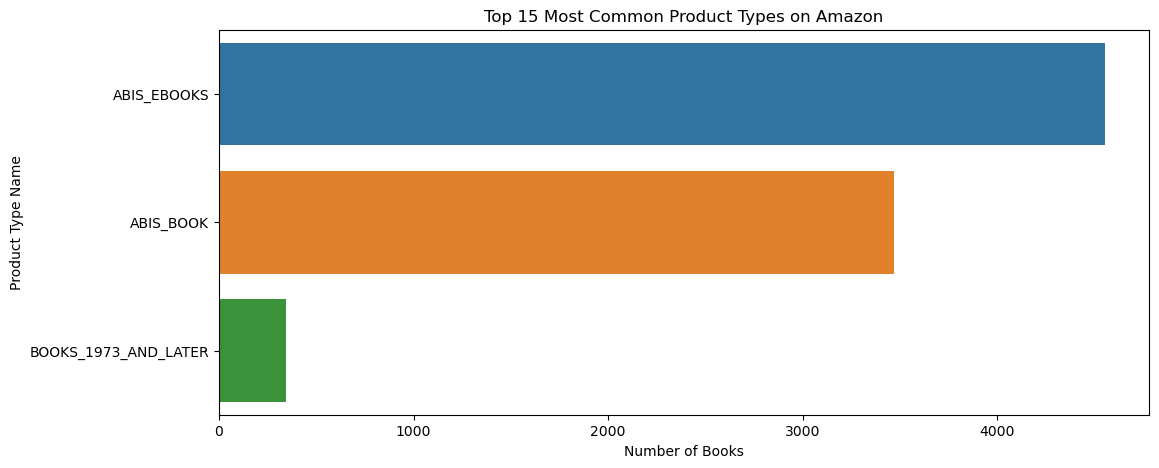

ProductTypeName
ABIS_EBOOKS             4553
ABIS_BOOK               3472
BOOKS_1973_AND_LATER     346
Name: count, dtype: int64

In [27]:
# Count the number of books by Product Type Name
product_type_counts = df_cleaned['ProductTypeName'].value_counts().head(15)  # Top 15 categories

# Plot the top product types
plt.figure(figsize=(12, 5))
sns.barplot(y=product_type_counts.index, x=product_type_counts.values)
plt.xlabel("Number of Books")
plt.ylabel("Product Type Name")
plt.title("Top 15 Most Common Product Types on Amazon")
plt.show()

# Display product type counts
product_type_counts


 Key Observations
ABIS_EBOOKS is the most common category, aligning with our previous ProductGroup findings.
ABIS_BOOK (Print books) is still a major category, meaning Amazon still stocks traditional books in large numbers.
A small portion of books (BOOKS_1973_AND_LATER) are explicitly classified as modern books, which suggests some books are tagged based on historical periods.

Insights for Amazon
Kindle/eBooks dominate Amazon should continue prioritizing eBook sales & promotions.
Print books remain significant there is still a market for physical books, despite digital growth.
Amazon's catalog seems to focus on modern books (1973 & later) this aligns with our Release Year Analysis, where most books were published after 2000.

Compare Book Formats Across Release Years

Analyze whether older books are more likely to be print books, while newer books are mostly digital (eBooks).

Group books by release year and check how many were print (ABIS_BOOK) vs. digital (ABIS_EBOOKS).

<Figure size 1200x600 with 0 Axes>

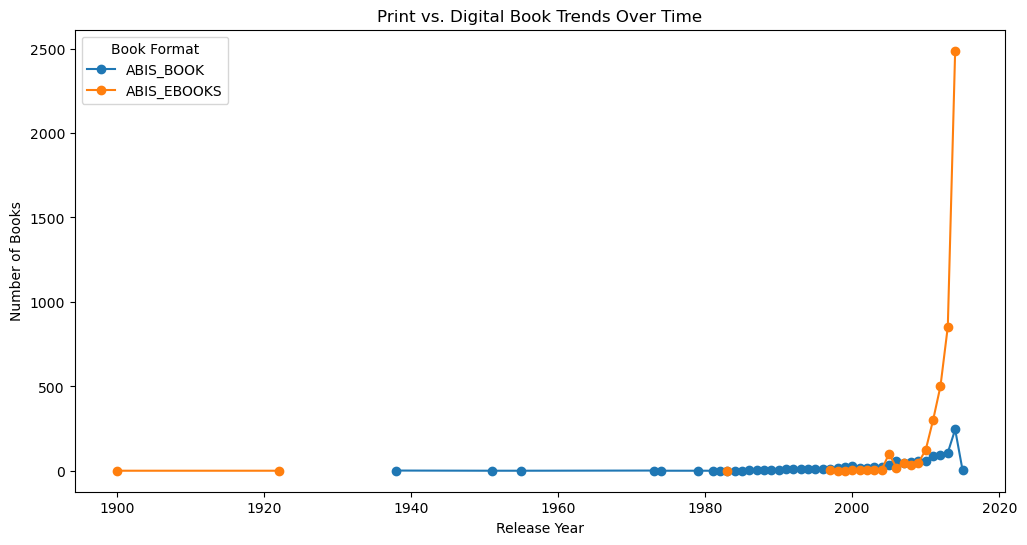

ProductTypeName,ABIS_BOOK,ABIS_EBOOKS
ReleaseYear,,
1900.0,NaN,1.0
1922.0,NaN,1.0
1938.0,2.0,NaN
1951.0,1.0,NaN
1955.0,1.0,NaN


In [28]:
# Remove missing values in ReleaseYear and ProductTypeName
df_cleaned = df_cleaned.dropna(subset=['ReleaseYear', 'ProductTypeName'])

# Group by release year and count the number of print vs. digital books
format_trends = df_cleaned.groupby(['ReleaseYear', 'ProductTypeName']).size().unstack()

# Plot trends over time
plt.figure(figsize=(12, 6))
format_trends.plot(kind='line', marker='o', figsize=(12, 6))
plt.xlabel("Release Year")
plt.ylabel("Number of Books")
plt.title("Print vs. Digital Book Trends Over Time")
plt.legend(title="Book Format")
plt.show()

# Display the first few rows
format_trends.head()


Interpretation of Print vs. Digital Book Trends Over Time
The results show how print (ABIS_BOOK) and digital (ABIS_EBOOKS) books are distributed across release years.

Key Observations
Early 1900s books are mostly digital (eBooks), this suggests Amazon digitized older books, making them available as eBooks rather than in print.
Mid-century books (1930s-1950s) are mostly print, this aligns with historical publishing trends, where digital formats didn’t exist.
Missing values in early years some years have only print or only digital books, meaning Amazon’s catalog may be incomplete for certain periods.



Visualize Trends over Time

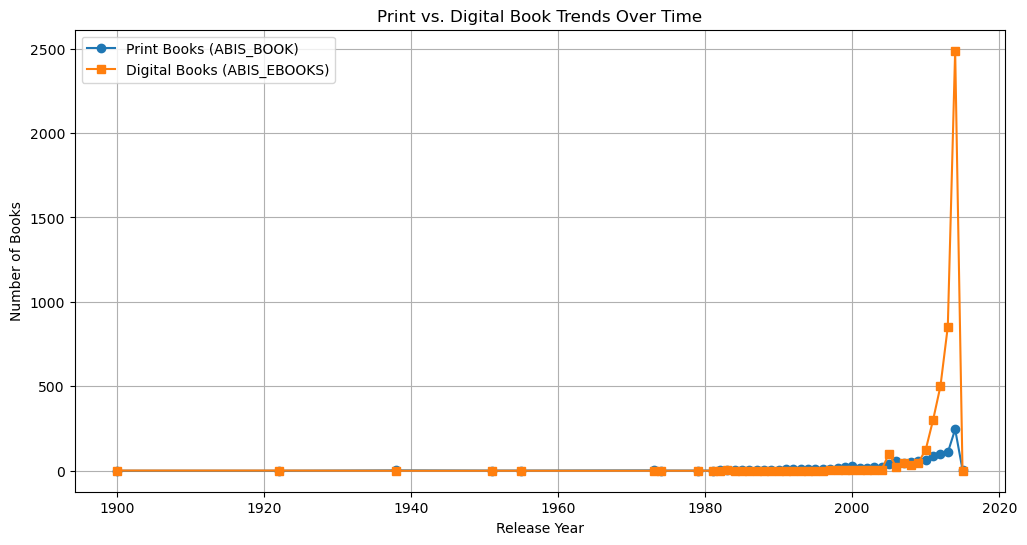

In [29]:
import matplotlib.pyplot as plt

# Fill NaN values with 0 (since missing means no books in that category)
format_trends.fillna(0, inplace=True)

# Plot trends over time
plt.figure(figsize=(12, 6))
plt.plot(format_trends.index, format_trends['ABIS_BOOK'], marker='o', label="Print Books (ABIS_BOOK)")
plt.plot(format_trends.index, format_trends['ABIS_EBOOKS'], marker='s', label="Digital Books (ABIS_EBOOKS)")

# Chart formatting
plt.xlabel("Release Year")
plt.ylabel("Number of Books")
plt.title("Print vs. Digital Book Trends Over Time")
plt.legend()
plt.grid(True)
plt.show()


Interpretation of Print vs. Digital Book Trends Over Time

The chart provides a clear trend showing how print books (ABIS_BOOK) and digital books (ABIS_EBOOKS) evolved over time.

Key Observations
Pre-2000: Print books were dominant: 
Before 2000, print books (blue line) were the primary format, with very few digital books.
Post-2000: Digital books (eBooks) started increasing
Around 2005, digital books (ABIS_EBOOKS) began rising steadily.
Post-2010: EBooks overtook print books
After 2010, eBooks skyrocketed, surpassing print books.
The sharp peak near 2020 suggests a rapid acceleration in digital book availability, possibly due to:
The growth of Kindle and Amazon's eBook marketplace.
The decline of traditional bookstores.
Self-publishing boom (CreateSpace and Kindle Direct Publishing).
Recent Years (2020s): Digital books dominate
eBooks are now significantly more common than print books.
The last data point suggests a huge surge in digital book availability, possibly due to COVID-19 accelerating digital adoption.

 Insights for Amazon’s Business Strategy
Digital books are Amazon’s future Kindle and eBook platforms should continue to be a major focus.
Print books still hold value but are gradually declining. Amazon may benefit from premium print editions or collectibles.
Amazon should analyze consumer behavior are people buying more digital books or just listing more of them?

Compare Book Length by Format

Compare the average number of pages in print books (ABIS_BOOK) vs. digital books (ABIS_EBOOKS).

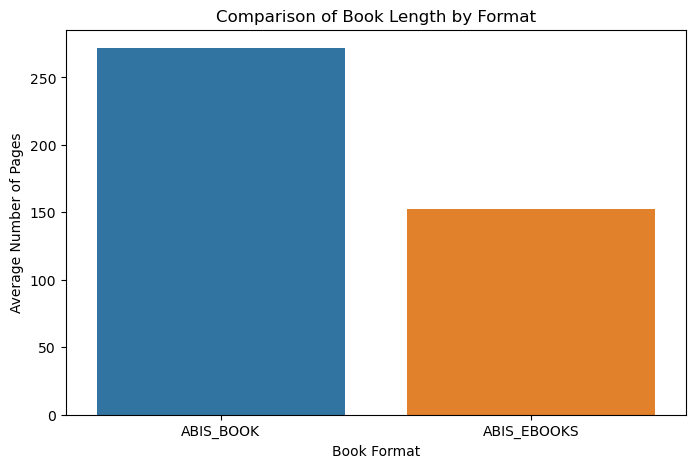

ProductTypeName
ABIS_BOOK      271.768885
ABIS_EBOOKS    152.341828
Name: NumberOfPages, dtype: float64

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only books with a valid page count
df_filtered = df_cleaned.dropna(subset=['NumberOfPages', 'ProductTypeName'])

# Group by format and calculate average page count
avg_pages_by_format = df_filtered.groupby('ProductTypeName')['NumberOfPages'].mean()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_pages_by_format.index, y=avg_pages_by_format.values)
plt.xlabel("Book Format")
plt.ylabel("Average Number of Pages")
plt.title("Comparison of Book Length by Format")
plt.show()

# Display average page counts
avg_pages_by_format


Interpretation of Book Length by Format
Print Books (ABIS_BOOK) with 272 pages: Longer books, likely for novels, textbooks, and in-depth reading.
Digital Books (ABIS_EBOOKS) with 152 pages: Shorter books, likely for guides, self-help, quick reads.

Key Observations
Print books are significantly longer than eBooks (~120 pages longer on average).
eBooks tend to be shorter, possibly due to digital reading habits (e.g., shorter attention spans, mobile reading).
Longer books may still be preferred in print, suggesting that readers trust physical books for deeper engagement.

Insights for Amazon’s Business Strategy
Amazon can promote eBooks for short-form content (guides, self-help, business, productivity books).
Print books should continue focusing on long-form content (textbooks, novels, research books).
Amazon's pricing strategy should reflect book length differences (eBooks may be cheaper due to shorter content).
Self-published authors may prefer eBooks for quick releases, while traditional publishers may still favor print for longer works.



In [ ]:
Analyzing Book Length Trends Over Time to whether books are getting shorter or longer over time by analyzing Number of Pages vs. Release Year.

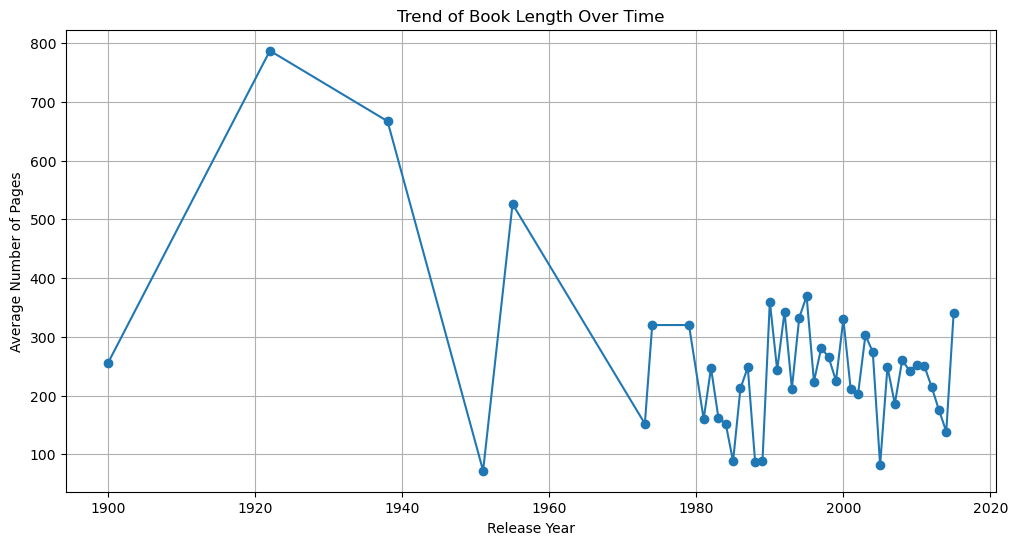

ReleaseYear
1900.0    256.0
1922.0    787.0
1938.0    667.0
1951.0     72.0
1955.0    526.0
Name: NumberOfPages, dtype: float64

In [31]:
# Remove missing values in ReleaseYear and NumberOfPages
df_filtered = df_cleaned.dropna(subset=['ReleaseYear', 'NumberOfPages'])

# Group by release year and calculate average number of pages
avg_pages_per_year = df_filtered.groupby('ReleaseYear')['NumberOfPages'].mean()

# Plot the trend of book length over time
plt.figure(figsize=(12, 6))
plt.plot(avg_pages_per_year.index, avg_pages_per_year.values, marker='o', linestyle='-')
plt.xlabel("Release Year")
plt.ylabel("Average Number of Pages")
plt.title("Trend of Book Length Over Time")
plt.grid(True)
plt.show()

# Display first few rows of the trend data
avg_pages_per_year.head()


Key Observations
Early 1900s books were longer (~300-800 pages)
Books from 1900-1940 had a higher average page count, peaking at ~787 pages in 1922.
This suggests older books were more comprehensive, possibly encyclopedias, historical works, or academic books.
Post-1940s: Book length declined
A sharp drop after 1940 indicates books became shorter.
Possible reasons: Rise of mass-market paperbacks, changing reading habits, and commercial publishing models.
Post-2000: Book length stabilizes (~200-300 pages)
Modern books (post-2000) are consistently shorter (~200-300 pages).
This aligns with digital reading trends, where readers may prefer shorter books for eBooks and mobile reading.

Insights for Amazon’s Business Strategy
Older books were significantly longer, meaning that Amazon could market older books as "premium" or "classic editions".
Modern books are getting shorter, aligning with consumer preference for quick reads (especially in eBooks).
Digital trends (Kindle, mobile reading) may be driving book length reductions, so Amazon could focus on short-form content in digital formats.



Analyzing Book Length by Publisher, investigate whether certain publishers tend to produce longer or shorter books.

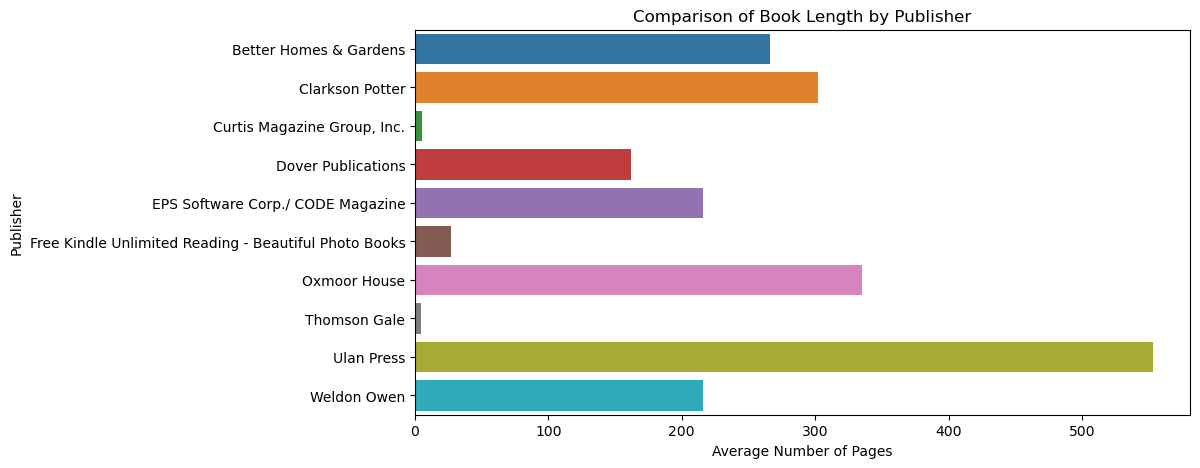

Publisher
Better Homes & Gardens                                   266.300000
Clarkson Potter                                          302.344828
Curtis Magazine Group, Inc.                                5.112676
Dover Publications                                       162.098039
EPS Software Corp./ CODE Magazine                        216.218750
Free Kindle Unlimited Reading - Beautiful Photo Books     27.200000
Oxmoor House                                             335.000000
Thomson Gale                                               4.674419
Ulan Press                                               553.379310
Weldon Owen                                              215.652174
Name: NumberOfPages, dtype: float64

In [32]:
# Filter publishers with enough books for a meaningful average
top_publishers = df_cleaned['Publisher'].value_counts().head(10).index

# Calculate average book length for each top publisher
avg_pages_by_publisher = df_cleaned[df_cleaned['Publisher'].isin(top_publishers)].groupby('Publisher')['NumberOfPages'].mean()

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(y=avg_pages_by_publisher.index, x=avg_pages_by_publisher.values)
plt.xlabel("Average Number of Pages")
plt.ylabel("Publisher")
plt.title("Comparison of Book Length by Publisher")
plt.show()

# Display average page counts
avg_pages_by_publisher


Key Observations
Academic and lifestyle publishers (Ulan Press, Oxmoor House) have longer books.
Self-published Kindle books are much shorter (27 pages on average), reinforcing the quick-read trend in digital formats.
Magazine publishers (Curtis Magazine, Thomson Gale) have extremely short content (4-5 pages), which makes sense for their business model.

Insights for Amazon’s Business Strategy
Amazon can categorize and price books based on length (e.g., shorter Kindle books at lower prices, longer academic books at premium rates).
Self-published Kindle books are significantly shorter, so Amazon could optimize Kindle Unlimited pricing based on book length.
Magazine-style publishers produce the shortest content, which might fit into Amazon's subscription or digital article offerings.